In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.4.1


In [2]:
import pandas as pd

datastore = pd.read_json('../input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json', lines = True)

sentences = datastore['headline'].tolist()
labels = datastore['is_sarcastic'].tolist()
urls = datastore['article_link'].tolist()

vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [3]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [4]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [5]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [8]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 3s - loss: 0.6672 - accuracy: 0.5778 - val_loss: 0.5869 - val_accuracy: 0.6792
Epoch 2/30
625/625 - 2s - loss: 0.4343 - accuracy: 0.8263 - val_loss: 0.3879 - val_accuracy: 0.8341
Epoch 3/30
625/625 - 2s - loss: 0.3141 - accuracy: 0.8748 - val_loss: 0.3553 - val_accuracy: 0.8487
Epoch 4/30
625/625 - 2s - loss: 0.2622 - accuracy: 0.8977 - val_loss: 0.3437 - val_accuracy: 0.8562
Epoch 5/30
625/625 - 2s - loss: 0.2276 - accuracy: 0.9113 - val_loss: 0.3438 - val_accuracy: 0.8574
Epoch 6/30
625/625 - 2s - loss: 0.1982 - accuracy: 0.9244 - val_loss: 0.3514 - val_accuracy: 0.8569
Epoch 7/30
625/625 - 2s - loss: 0.1773 - accuracy: 0.9331 - val_loss: 0.3725 - val_accuracy: 0.8514
Epoch 8/30
625/625 - 2s - loss: 0.1583 - accuracy: 0.9421 - val_loss: 0.3759 - val_accuracy: 0.8544
Epoch 9/30
625/625 - 2s - loss: 0.1425 - accuracy: 0.9485 - val_loss: 0.3955 - val_accuracy: 0.8493
Epoch 10/30
625/625 - 2s - loss: 0.1295 - accuracy: 0.9542 - val_loss: 0.4308 - val_accuracy: 0.8411

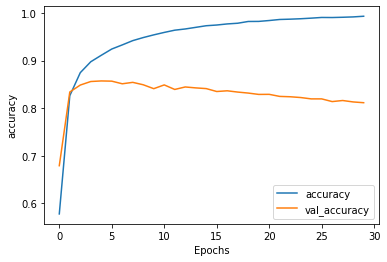

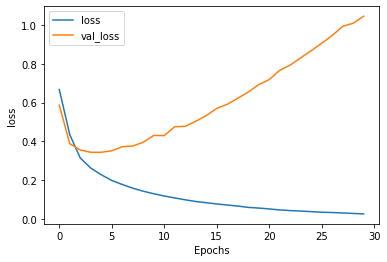

In [9]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [11]:
sentence = ["siamese cat breaks into house and steals famous painting", "Joe Biden is elected as 46th president of the United States"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.9760662 ]
 [0.01709434]]
